In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# load the Social_Network_Ads dataset 

SNAdata = pd.read_csv(r"C:\Users\Admin\Downloads\files\Ravi sir\practice\Social_Network_Ads.csv", header=0)

# Copy the file to back-up file

SNAdata_bk = SNAdata.copy()

# display first 5 records

SNAdata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Display data information

SNAdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
# Character variables Gender to encode by using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

SNAdata['Gender'] = le.fit_transform(SNAdata['Gender'])
SNAdata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [5]:
# Delete the variables which are influencing the target variable

del SNAdata['User ID']
SNAdata.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [6]:
# Identify variables for scaling

cols1 = ['Age', 'EstimatedSalary']

In [7]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in SNAdata.columns:
    if col != 'Purchased':
        IndepVar.append(col)

TargetVar = 'Purchased'

x = SNAdata[IndepVar]
y = SNAdata[TargetVar]

In [8]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=None)
x_test_F1 = x_test.copy()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [9]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

# Naive Bayes model (GaussianNB) Algorithm

Confusion matrix : 
 [[21  8]
 [ 2 49]]
Outcome values : 
 21 8 2 49
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.72      0.81        29
           0       0.86      0.96      0.91        51

   micro avg       0.88      0.88      0.88        80
   macro avg       0.89      0.84      0.86        80
weighted avg       0.88      0.88      0.87        80

Accuracy : 87.5 %
Precision : 91.3 %
Recall : 72.4 %
F1 Score : 0.808
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 84.2 %
MCC : 0.727
roc_auc_score: 0.842


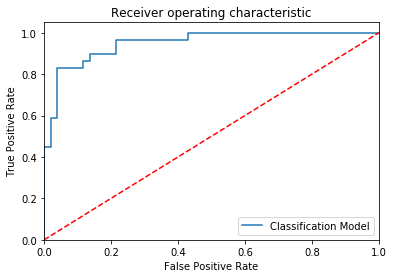

-----------------------------------------------------------------------------------------------------


In [11]:
# Training the Naive Bayes model (GaussianNB) on the Training set

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

# Fit the model with train data

modelGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelGNB.predict(x_test)
y_pred_prob = modelGNB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,modelGNB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [12]:
# Load the result dataset

EMResults = pd.read_csv(r"C:\Users\Admin\Downloads\files\Ravi sir\practice\HTResults.csv", header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# GaussianNB - Compare with other classification models

Model Name:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Confusion matrix : 
 [[14 15]
 [ 1 50]]
Outcome values : 
 14 15 1 50
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.48      0.64        29
           0       0.77      0.98      0.86        51

   micro avg       0.80      0.80      0.80        80
   macro avg       0.85      0.73      0.75        80
weighted avg       0.83      0.80      0.78        80

Accuracy : 80.0 %
Precision : 93.3 %
Recall : 48.3 %
F1 Score : 0.636
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 73.2 %
MCC : 0.57
roc_auc_score: 0.732


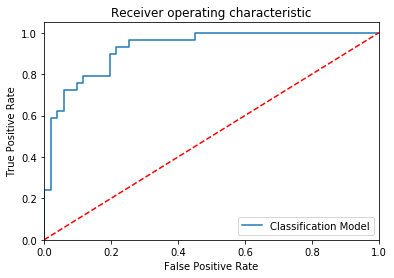

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Confusion matrix : 
 [[23  6]
 [ 4 47]]
Outcome values : 
 23 6 4 47
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.79      0.82        29
           0       0.89      0.92      0.90        51

   micro avg       0.88      0.88      0.88        80
   macro avg       0.87      0.86      0.86        80
weighted avg       0.87      0.88      0.87        80

Accuracy : 87.5 %
Precision : 85.2 %
Recall : 79.3 %
F1 Score : 0.821
Specificity or True Negative Rate : 92.2 %


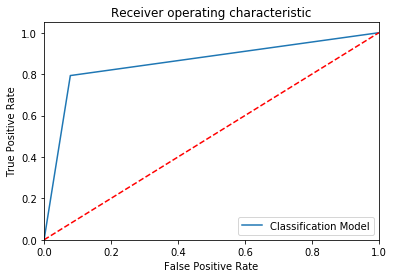

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Confusion matrix : 
 [[22  7]
 [ 4 47]]
Outcome values : 
 22 7 4 47
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.76      0.80        29
           0       0.87      0.92      0.90        51

   micro avg       0.86      0.86      0.86        80
   macro avg       0.86      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80

Accuracy : 86.2 %
Precision : 84.6 %
Re

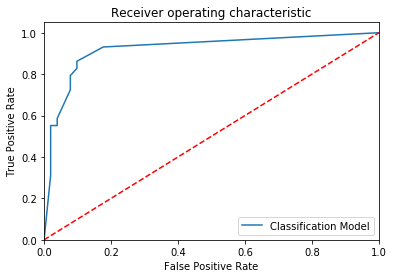

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Confusion matrix : 
 [[16 13]
 [ 1 50]]
Outcome values : 
 16 13 1 50
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.55      0.70        29
           0       0.79      0.98      0.88        51

   micro avg       0.82      0.82      0.82        80
   macro avg       0.87      0.77      0.79        80
weighted avg       0.85      0.82      0.81        80

Accuracy : 82.5 %
Precision : 94.1 %
Recall : 55.2 %
F1 Score : 0.696
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 76.6 %
MCC : 0.625
roc_auc_score: 0.766


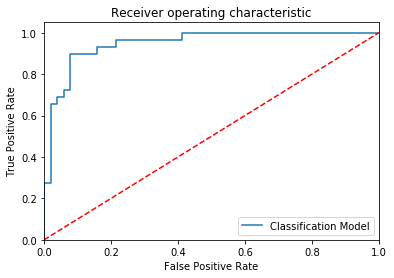

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB(priors=None, var_smoothing=1e-09)
Confusion matrix : 
 [[21  8]
 [ 2 49]]
Outcome values : 
 21 8 2 49
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.72      0.81        29
           0       0.86      0.96      0.91        51

   micro avg       0.88      0.88      0.88        80
   macro avg       0.89      0.84      0.86        80
weighted avg       0.88      0.88      0.87        80

Accuracy : 87.5 %
Precision : 91.3 %
Recall : 72.4 %
F1 Score : 0.808
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 84.2 %
MCC : 0.727
roc_auc_score: 0.842


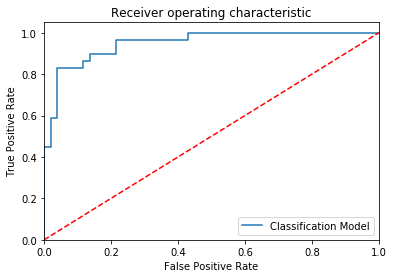

-----------------------------------------------------------------------------------------------------


In [14]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelSVM = SVC(probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelSVM, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [15]:
# Results with comparing the all the algorithms

#EMResults.to_csv("D://00 Henotic//SRKR//Datasets//Results//EMResults_22.csv")

EMResults.head(20)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"LogisticRegression(C=1.0, class_weight=None, d...",14,15,1,50,0.800,0.933,0.483,0.636,0.980,0.570,0.731575,0.732
1,"DecisionTreeClassifier(class_weight=None, crit...",23,6,4,47,0.875,0.852,0.793,0.821,0.922,0.727,0.857336,0.858
2,"(DecisionTreeClassifier(class_weight=None, cri...",22,7,4,47,0.862,0.846,0.759,0.800,0.922,0.698,0.840095,0.840
3,"SVC(C=1.0, cache_size=200, class_weight=None, ...",16,13,1,50,0.825,0.941,0.552,0.696,0.980,0.625,0.766058,0.766
4,"GaussianNB(priors=None, var_smoothing=1e-09)",21,8,2,49,0.875,0.913,0.724,0.808,0.961,0.727,0.842461,0.842
